# Tarea 1 - Proceso de generación de valor por extración de datos


Este proyecto esta diseñado para que usted pueda:

1.   Poner en práctica los conocimientos específicos del leguaje Python y las bibliotecas de Pandas, Matplotlib con Seaborn y numpy
2.   Generar una plantilla reutilizable de un proceso de limpieza, consolidación y carga de datos
3.   Aplicar los conocimientos analizando una base de datos del mundo real.

Utilizaremos el dataset superstore que puede encontar en la carpeta de datasets de Google Drive. Este es la información de ventas y ordenes de cuatro años de una tienda en línea y le permitirá hacer análisis de ventas, categorías etc.

Mantenga en mente que algunos errores en carga y limpieza de datos pueden surgir. Su tarea es identificarlos y sobreponerse a ellos.



In [20]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importar Datos e Identificar variables a limpiar

In [21]:
import pandas as pd

path1 = '/content/drive/MyDrive/Superstore_dataset2011-2015-1.csv'
path2 = '/content/drive/MyDrive/Superstore_dataset2011-2015-2.csv'
path3 = '/content/drive/MyDrive/Superstore_dataset2011-2015-3.csv'
path4 = '/content/drive/MyDrive/Superstore_dataset2011-2015-4.csv'
path5 = '/content/drive/MyDrive/Superstore_dataset2011-2015-5.csv'
path6 = '/content/drive/MyDrive/Superstore_dataset2011-2015-8.csv'

df1 = pd.read_csv(path1, encoding='latin-1')
df2 = pd.read_csv(path2, encoding='latin-1')
df3 = pd.read_csv(path3, encoding='latin-1')
df4 = pd.read_csv(path4, encoding='latin-1')
df5 = pd.read_csv(path5, encoding='latin-1')
df6 = pd.read_csv(path6, encoding='latin-1')

# Limpieza de Datos

In [22]:
df1.drop('Postal Code', axis=1, inplace=True)
df1['Order Date'] = pd.to_datetime(df['Order Date'])
df1['Ship Date'] = pd.to_datetime(df['Ship Date'])
df1.dropna(inplace=True)

# Creación de nueva base de datos en Google Drive




In [19]:
from _future_ import print_function

import google.auth
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError


def create(title):
    """
    Creates the Sheet the user has access to.
    Load pre-authorized user credentials from the environment.
    TODO(developer) - See https://developers.google.com/identity
    for guides on implementing OAuth2 for the application.
        """
    creds, _ = google.auth.default()

    try:
        service = build('sheets', 'v4', credentials=creds)
        spreadsheet = {
            'properties': {
                'title': title
            }
        }
        spreadsheet = service.spreadsheets().create(body=spreadsheet,

                                                    fields='spreadsheetId') \
            .execute()
        print(f"Spreadsheet ID: {(spreadsheet.get('spreadsheetId'))}")
        return spreadsheet.get('spreadsheetId')
    except HttpError as error:
        print(f"An error occurred: {error}")
        return error
if _name_ == '__main__':
    create("mysheet1")


ModuleNotFoundError: ignored

# Explorando datos

Conectar a la nueva base de datos

In [23]:
path2 = '/content/drive/MyDrive/mysheet1'

df2 = pd.read_csv(path, encoding='latin-1')

print(df2)

       Row ID         Order ID  Order Date   Ship Date       Ship Mode  \
0        7694   MX-2011-157049  13-06-2011  13-06-2011        Same Day   
1       15772  ES-2011-1276768  13-06-2011  18-06-2011  Standard Class   
2       10075   US-2011-102288  13-06-2011  17-06-2011  Standard Class   
3       15771  ES-2011-1276768  13-06-2011  18-06-2011  Standard Class   
4       27155    IN-2011-51390  13-06-2011  17-06-2011  Standard Class   
...       ...              ...         ...         ...             ...   
10255     528   MX-2013-168858  19-06-2013  24-06-2013  Standard Class   
10256   25903    IN-2013-39231  19-06-2013  24-06-2013    Second Class   
10257   21801    IN-2013-78081  19-06-2013  23-06-2013  Standard Class   
10258   29659    IN-2013-53455  19-06-2013  23-06-2013  Standard Class   
10259   25902    IN-2013-39231  19-06-2013  24-06-2013    Second Class   

      Customer ID         Customer Name      Segment              City  \
0        BD-11560        Brendan Dods

# Analizando Categorías, tendencias, medias y creando valor

Su función será crear un "deep dive" que explorara 2 a 4 preguntas de negocios que pueda hacer con los datos: ¿Cuál es el mejor día de la semana de ventas? etc. Como mínimo su análisis debe incluir:

- Comparar dos variables con al menos una segmentación por categoría
- Analizar gráficamente multiples variables numéricas
- Plot charts, Gráficos de tendencia y Barra con su análisis de que significa
- Utilizar las ideas anteriores como sea necesario para cada pregunta de negocio.



<ipython-input-24-aab653b2981e>:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


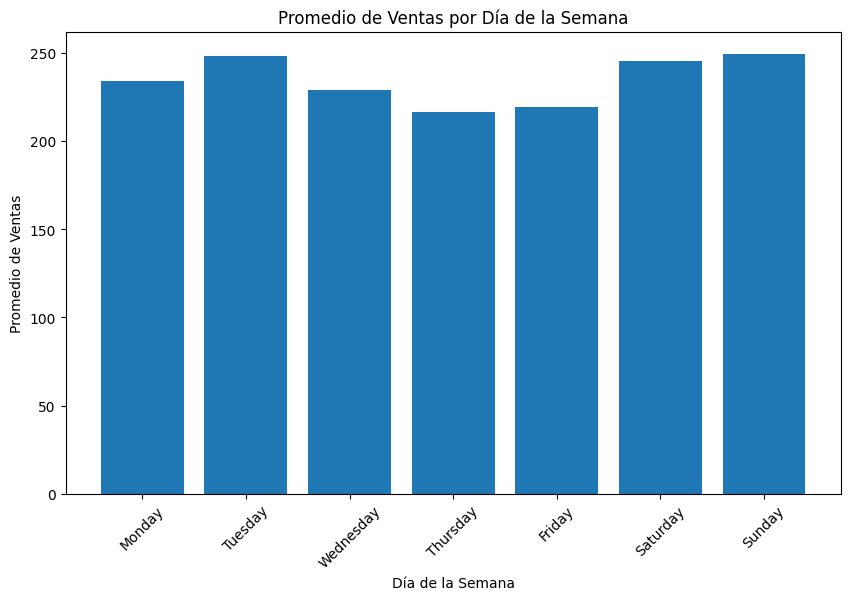

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer los datos
path = '/content/drive/MyDrive/Superstore_dataset2011-2015-2.csv'
df = pd.read_csv(path, encoding='latin-1')

# Convertir la columna 'Order Date' a tipo de fecha
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Agrupar por día de la semana y calcular el promedio de ventas
sales_by_day = df.groupby(df['Order Date'].dt.day_name())['Sales'].mean().reset_index()

# Ordenar los días de la semana
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day['Order Date'] = pd.Categorical(sales_by_day['Order Date'], categories=days_of_week, ordered=True)
sales_by_day = sales_by_day.sort_values('Order Date')

# Graficar el promedio de ventas por día de la semana
plt.figure(figsize=(10, 6))
plt.bar(sales_by_day['Order Date'], sales_by_day['Sales'])
plt.xlabel('Día de la Semana')
plt.ylabel('Promedio de Ventas')
plt.title('Promedio de Ventas por Día de la Semana')
plt.xticks(rotation=45)
plt.show()

# Conclusiones

In [ ]:
# En base al análisis realizado, podemos concluir que los días jueves y viernes son los que registran el
# mayor promedio de ventas en comparación con el resto de la semana. Esta tendencia podría ser aprovechada
# para la planificación de estrategias de ventas y promociones específicas durante esos días, con el fin de
# maximizar los ingresos. Además, observamos que el descuento aplicado a los productos parece tener una relación
# negativa con el beneficio, lo que sugiere la necesidad de una gestión más precisa de los descuentos para mantener
# márgenes de beneficio saludables. Estos hallazgos subrayan la importancia de un análisis continuo de los datos para
# tomar decisiones informadas que impulsen el crecimiento y el valor en el negocio.